In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [4]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
x=df.iloc[:,[2,3]]


In [6]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(x,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [8]:
x_train

array([[ 0.98322099,  0.4438231 ],
       [-0.01051573, -0.05203819],
       [-1.11466765,  0.82525485],
       [-1.48271829, -1.38704935],
       [-1.00425246,  1.13040026],
       [ 0.24711972,  0.21496404],
       [-0.78342208, -0.58604265],
       [ 1.57210202,  1.28297297],
       [-0.0473208 ,  0.13867769],
       [ 0.4679501 , -1.69219475],
       [-0.67300688,  0.32939357],
       [ 0.39433997,  1.66440472],
       [ 0.76239061, -1.7684811 ],
       [-0.82022714,  1.5499752 ],
       [ 0.24711972, -0.31904042],
       [ 0.13670452, -0.20461089],
       [-1.18827778, -0.73861536],
       [ 0.50475516,  0.78711168],
       [ 0.0630944 , -0.39532677],
       [ 0.09989946,  0.10053451],
       [-1.62993855, -1.73033793],
       [-0.23134612, -0.12832454],
       [-0.74661701,  0.13867769],
       [ 1.49849189,  0.63453898],
       [ 1.57210202,  0.67268215],
       [-0.23134612, -0.20461089],
       [ 0.68878048,  1.20668661],
       [-0.9674474 , -1.31076299],
       [ 1.57210202,

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
score=[]
for k in range(2,11):
  Kmeans=KMeans(n_clusters=k,init='k-means++')
  Kmeans.fit(x_train)
  x_pred=Kmeans.predict(x_test)
  wcss.append(Kmeans.inertia_)
  score.append(silhouette_score(x_test, x_pred))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [10]:
wcss

[199.37387337499743,
 110.90694017259396,
 74.96917235414034,
 69.43103132128296,
 40.12220574072723,
 35.179523967747734,
 26.625908085977084,
 21.97658998751552,
 19.638358186060447]

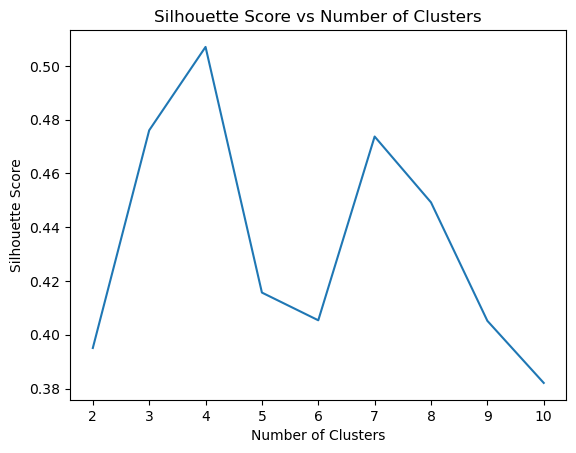

In [11]:
plt.plot(range(2,11),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


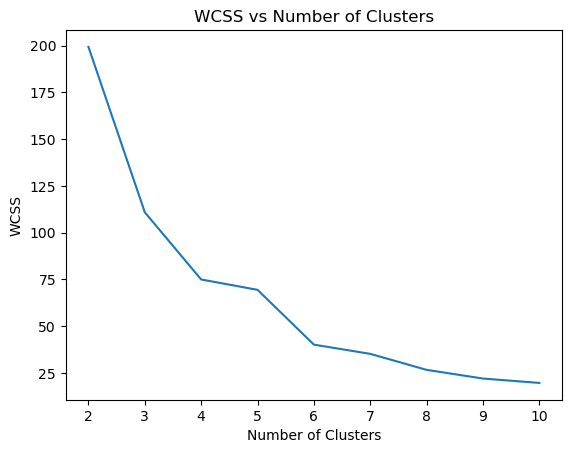

In [12]:
plt.plot(range(2,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs Number of Clusters')
plt.show()


In [13]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(6)

In [14]:
x_pred

array([4, 7, 3, 0, 0, 4, 1, 0, 0, 1, 1, 5, 8, 4, 5, 8, 1, 0, 4, 1, 0, 9,
       0, 4, 1, 1, 1, 1, 8, 4, 7, 9, 1, 1, 0, 4, 6, 8, 0, 1, 4, 2, 9, 3,
       4, 2, 7, 7, 6, 4, 4, 6, 7, 4, 4, 1, 0, 4, 0, 4], dtype=int32)

In [15]:
model=KMeans(n_clusters=5,init='k-means++')
model.fit(x_train)
x_pred=model.predict(x_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
x_pred

array([1, 4, 3, 0, 0, 1, 1, 0, 0, 4, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 3,
       0, 1, 1, 1, 1, 1, 2, 1, 4, 3, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 3, 3,
       1, 2, 4, 4, 2, 1, 1, 2, 4, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

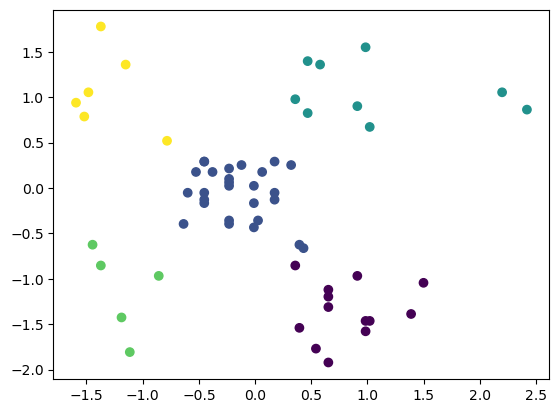

In [17]:
plt.scatter(x_test[:,0], x_test[:,1], c=x_pred, cmap='viridis', label="Test points")

In [18]:
centroid=model.cluster_centers_
centroid


array([[ 1.14884378, -1.27782116],
       [-0.20859389, -0.08463327],
       [ 0.94273542,  1.20541517],
       [-1.29436296, -1.20306461],
       [-1.25498696,  1.06603365]])

In [19]:
original_centres=scaler.inverse_transform(centroid)
original_centres


array([[91.5       , 17.86363636],
       [54.61818182, 49.14545455],
       [85.9       , 82.96666667],
       [25.11764706, 19.82352941],
       [26.1875    , 79.3125    ]])

In [20]:
cluster_mapping = {
    0: "High income, Low spending -> Careful/Frugal Customers -> give discounts",
    1: "Average income, Average spending -> Standard Customers -> give loyalty points",
    2: "High income, High spending -> Target / Premium Customers -> offer premium membership",
    3: "Low income, High spending -> Young/Impulsive Customers -> offer flash sales ",
    4: "Very High income, Low spending ->  Conservative/Rich but Not Spending ->  offer personalized services"
}

In [21]:
import pickle
pickle.dump(model,open('kmeans.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

